--- Bắt đầu quy trình Huấn luyện & Đánh giá Mô hình ---
[1/6] Đã tải thành công file 'npm_shuffled.csv' với 8984 mẫu.
[2/6] Đã tách dữ liệu thành 16 đặc tính (X) và nhãn (y).
[3/6] Đã chia dữ liệu: 7187 mẫu huấn luyện, 1797 mẫu kiểm thử.
[4/6] Đã chuẩn hóa dữ liệu bằng StandardScaler.
[5/6] Bắt đầu huấn luyện mô hình Random Forest...
Huấn luyện hoàn tất!
[6/6] Đánh giá hiệu suất trên tập kiểm thử...

================== KẾT QUẢ ĐÁNH GIÁ ==================
✅ Độ chính xác (Accuracy): 0.9872 (98.72%)

📊 Báo cáo Phân loại (Classification Report):
                     precision    recall  f1-score   support

   An toàn (Benign)       1.00      0.96      0.98       600
Độc hại (Malicious)       0.98      1.00      0.99      1197

           accuracy                           0.99      1797
          macro avg       0.99      0.98      0.99      1797
       weighted avg       0.99      0.99      0.99      1797


🔀 Ma trận Nhầm lẫn (Confusion Matrix):
         Dự đoán An toàn | Dự đoán Độc hại


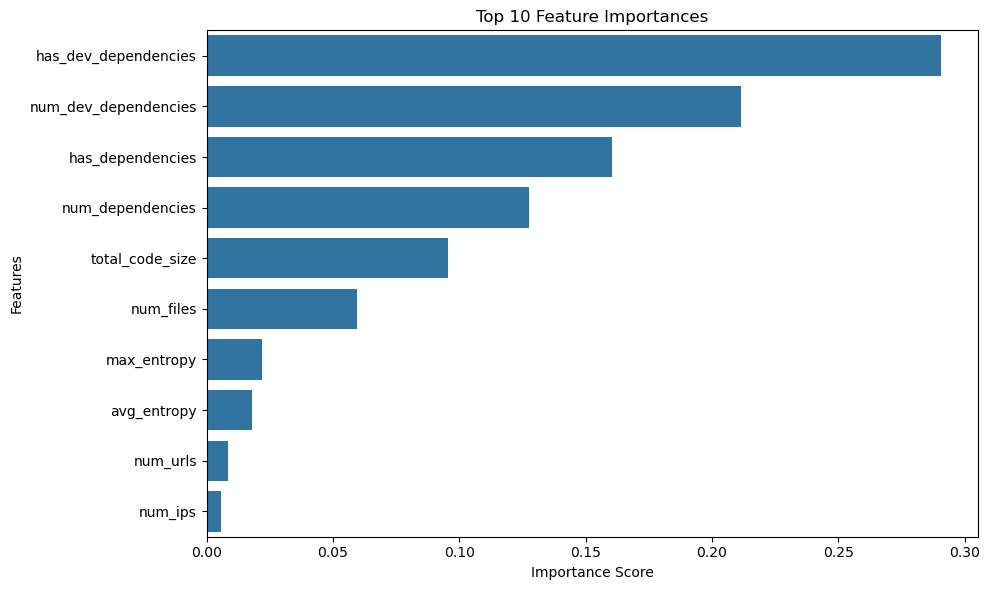

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# --- Cấu hình ---
INPUT_FILE = 'npm_shuffled.csv'

def train_and_evaluate(input_file):
    """
    Hàm hoàn chỉnh để tải dữ liệu, huấn luyện mô hình Random Forest,
    và đánh giá hiệu suất của nó.
    """
    print(f"--- Bắt đầu quy trình Huấn luyện & Đánh giá Mô hình ---")

    # --- Bước 1: Tải dữ liệu ---
    try:
        df = pd.read_csv(input_file)
        print(f"[1/6] Đã tải thành công file '{input_file}' với {len(df)} mẫu.")
    except FileNotFoundError:
        print(f"Lỗi: Không tìm thấy file '{input_file}'. Vui lòng chạy các script trước để tạo file này.")
        return

    # --- Bước 2: Tách Features (X) và Label (y) ---
    # Bỏ cột 'package_name' vì nó không phải là một đặc tính, và cột 'label' là kết quả cần dự đoán.
    X = df.drop(columns=['label', 'package_name'])
    y = df['label']

    # Xác định tên các đặc tính để sử dụng sau này
    feature_names = X.columns
    print(f"[2/6] Đã tách dữ liệu thành {X.shape[1]} đặc tính (X) và nhãn (y).")

    # --- Bước 3: Chia dữ liệu thành tập Huấn luyện và Kiểm thử ---
    # Chia 80% cho huấn luyện và 20% để kiểm thử.
    # stratify=y đảm bảo tỷ lệ nhãn 0 và 1 trong tập train và test là tương tự nhau.
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    print(f"[3/6] Đã chia dữ liệu: {len(X_train)} mẫu huấn luyện, {len(X_test)} mẫu kiểm thử.")

    # --- Bước 4: Chuẩn hóa Đặc tính ---
    # Feature Scaling rất quan trọng để nhiều mô hình hoạt động tốt.
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    print("[4/6] Đã chuẩn hóa dữ liệu bằng StandardScaler.")

    # --- Bước 5: Huấn luyện Mô hình ---
    # Random Forest là một lựa chọn mạnh mẽ, hiệu quả cho loại bài toán này.
    # n_estimators là số cây trong rừng. class_weight='balanced' giúp xử lý dữ liệu mất cân bằng.
    model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced', n_jobs=-1)

    print("[5/6] Bắt đầu huấn luyện mô hình Random Forest...")
    model.fit(X_train_scaled, y_train)
    print("Huấn luyện hoàn tất!")

    # --- Bước 6: Đánh giá Mô hình ---
    print("[6/6] Đánh giá hiệu suất trên tập kiểm thử...")
    y_pred = model.predict(X_test_scaled)

    # In ra các chỉ số đánh giá
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=['An toàn (Benign)', 'Độc hại (Malicious)'])
    conf_matrix = confusion_matrix(y_test, y_pred)

    print("\n================== KẾT QUẢ ĐÁNH GIÁ ==================")
    print(f"✅ Độ chính xác (Accuracy): {accuracy:.4f} ({accuracy*100:.2f}%)")
    print("\n📊 Báo cáo Phân loại (Classification Report):")
    print(report)
    print("\n🔀 Ma trận Nhầm lẫn (Confusion Matrix):")
    print("         Dự đoán An toàn | Dự đoán Độc hại")
    print("-------------------------------------------------")
    print(f"Thực tế An toàn   | {conf_matrix[0][0]:<15} | {conf_matrix[0][1]}")
    print(f"Thực tế Độc hại  | {conf_matrix[1][0]:<15} | {conf_matrix[1][1]}")
    print("-------------------------------------------------")
    # True Negative (TN) = conf_matrix[0][0]
    # False Positive (FP) = conf_matrix[0][1]
    # False Negative (FN) = conf_matrix[1][0]
    # True Positive (TP) = conf_matrix[1][1]

    # --- (Tùy chọn) Hiển thị độ quan trọng của các đặc tính ---
    print("\n✨ 10 Đặc tính Quan trọng nhất:")
    feature_importances = pd.Series(model.feature_importances_, index=feature_names).nlargest(10)
    print(feature_importances)

    # Vẽ biểu đồ
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importances, y=feature_importances.index)
    plt.title('Top 10 Feature Importances')
    plt.xlabel('Importance Score')
    plt.ylabel('Features')
    plt.tight_layout()
    plt.savefig('feature_importances.png')
    print("\n biểu đồ độ quan trọng của các đặc tính đã được lưu vào file 'feature_importances.png'")


if __name__ == '__main__':
    train_and_evaluate(INPUT_FILE)

In [2]:
# train_svm
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# --- Cấu hình ---
INPUT_FILE = 'npm_shuffled.csv'

def train_svm_model(input_file):
    print(f"--- Huấn luyện mô hình Support Vector Machine (SVM) ---")
    
    # Bước 1: Tải và chuẩn bị dữ liệu (tương tự các script khác)
    try:
        df = pd.read_csv(input_file)
    except FileNotFoundError:
        print(f"Lỗi: Không tìm thấy file '{input_file}'.")
        return

    X = df.drop(columns=['label', 'package_name'])
    y = df['label']
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    print(f"[1/3] Đã chuẩn bị xong dữ liệu.")

    # Bước 2: Huấn luyện mô hình SVM
    # kernel='rbf' là lựa chọn phổ biến và mạnh mẽ.
    # class_weight='balanced' rất quan trọng khi dữ liệu có thể mất cân bằng.
    # probability=True cho phép dự đoán xác suất nhưng làm chậm quá trình huấn luyện.
    model = SVC(kernel='rbf', class_weight='balanced', probability=True, random_state=42)
    print("[2/3] Bắt đầu huấn luyện mô hình SVM...")
    model.fit(X_train_scaled, y_train)
    print("Huấn luyện hoàn tất!")

    # Bước 3: Đánh giá mô hình
    print("[3/3] Đánh giá hiệu suất trên tập kiểm thử...")
    y_pred = model.predict(X_test_scaled)
    
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=['An toàn (Benign)', 'Độc hại (Malicious)'])

    print("\n================== KẾT QUẢ ĐÁNH GIÁ (SVM) ==================")
    print(f"✅ Độ chính xác (Accuracy): {accuracy:.4f} ({accuracy*100:.2f}%)")
    print("\n📊 Báo cáo Phân loại (Classification Report):")
    print(report)
    print("\n🔀 Ma trận Nhầm lẫn (Confusion Matrix):")
    print(confusion_matrix(y_test, y_pred))

if __name__ == '__main__':
    train_svm_model(INPUT_FILE)

--- Huấn luyện mô hình Support Vector Machine (SVM) ---
[1/3] Đã chuẩn bị xong dữ liệu.
[2/3] Bắt đầu huấn luyện mô hình SVM...
Huấn luyện hoàn tất!
[3/3] Đánh giá hiệu suất trên tập kiểm thử...

================== KẾT QUẢ ĐÁNH GIÁ (SVM) ==================
✅ Độ chính xác (Accuracy): 0.9861 (98.61%)

📊 Báo cáo Phân loại (Classification Report):
                     precision    recall  f1-score   support

   An toàn (Benign)       1.00      0.96      0.98       600
Độc hại (Malicious)       0.98      1.00      0.99      1197

           accuracy                           0.99      1797
          macro avg       0.99      0.98      0.98      1797
       weighted avg       0.99      0.99      0.99      1797


🔀 Ma trận Nhầm lẫn (Confusion Matrix):
[[ 575   25]
 [   0 1197]]


In [3]:
# train_lightgbm
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import lightgbm as lgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# --- Cấu hình ---
INPUT_FILE = 'npm_shuffled.csv'

def train_lgbm_model(input_file):
    print(f"--- Huấn luyện mô hình LightGBM ---")

    # Bước 1: Tải và chuẩn bị dữ liệu
    try:
        df = pd.read_csv(input_file)
    except FileNotFoundError:
        print(f"Lỗi: Không tìm thấy file '{input_file}'.")
        return

    X = df.drop(columns=['label', 'package_name'])
    y = df['label']
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    # Mặc dù LightGBM không quá nhạy cảm với feature scaling, đây vẫn là một bước thực hành tốt.
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    print(f"[1/3] Đã chuẩn bị xong dữ liệu.")

    # Bước 2: Huấn luyện mô hình LightGBM
    # objective='binary' cho bài toán phân loại nhị phân.
    model = lgb.LGBMClassifier(objective='binary', random_state=42, n_jobs=-1)
    print("[2/3] Bắt đầu huấn luyện mô hình LightGBM...")
    model.fit(X_train_scaled, y_train)
    print("Huấn luyện hoàn tất!")

    # Bước 3: Đánh giá mô hình
    print("[3/3] Đánh giá hiệu suất trên tập kiểm thử...")
    y_pred = model.predict(X_test_scaled)
    
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=['An toàn (Benign)', 'Độc hại (Malicious)'])

    print("\n================== KẾT QUẢ ĐÁNH GIÁ (LightGBM) ==================")
    print(f"✅ Độ chính xác (Accuracy): {accuracy:.4f} ({accuracy*100:.2f}%)")
    print("\n📊 Báo cáo Phân loại (Classification Report):")
    print(report)
    print("\n🔀 Ma trận Nhầm lẫn (Confusion Matrix):")
    print(confusion_matrix(y_test, y_pred))

if __name__ == '__main__':
    train_lgbm_model(INPUT_FILE)

--- Huấn luyện mô hình LightGBM ---
[1/3] Đã chuẩn bị xong dữ liệu.
[2/3] Bắt đầu huấn luyện mô hình LightGBM...
[LightGBM] [Info] Number of positive: 4788, number of negative: 2399
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016823 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1160
[LightGBM] [Info] Number of data points in the train set: 7187, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.666203 -> initscore=0.691061
[LightGBM] [Info] Start training from score 0.691061
Huấn luyện hoàn tất!
[3/3] Đánh giá hiệu suất trên tập kiểm thử...

================== KẾT QUẢ ĐÁNH GIÁ (LightGBM) ==================
✅ Độ chính xác (Accuracy): 0.9866 (98.66%)

📊 Báo cáo Phân loại (Classification Report):
                     precision    recall  f1-score   support

   An toàn (Benign)       0.99      0.96      0.9

/home/th/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


--- Huấn luyện mô hình K-Nearest Neighbors (KNN) ---
[1/3] Đã chuẩn bị xong dữ liệu.
[2/3] Bắt đầu 'huấn luyện' mô hình KNN (thực chất là lưu dữ liệu)...
Hoàn tất!
[3/3] Đánh giá hiệu suất trên tập kiểm thử...

================== KẾT QUẢ ĐÁNH GIÁ (KNN, k=5) ==================
✅ Độ chính xác (Accuracy): 0.9866 (98.66%)

📊 Báo cáo Phân loại (Classification Report):
                     precision    recall  f1-score   support

   An toàn (Benign)       1.00      0.96      0.98       600
Độc hại (Malicious)       0.98      1.00      0.99      1197

           accuracy                           0.99      1797
          macro avg       0.99      0.98      0.98      1797
       weighted avg       0.99      0.99      0.99      1797


🔀 Ma trận Nhầm lẫn (Confusion Matrix):
[[ 576   24]
 [   0 1197]]


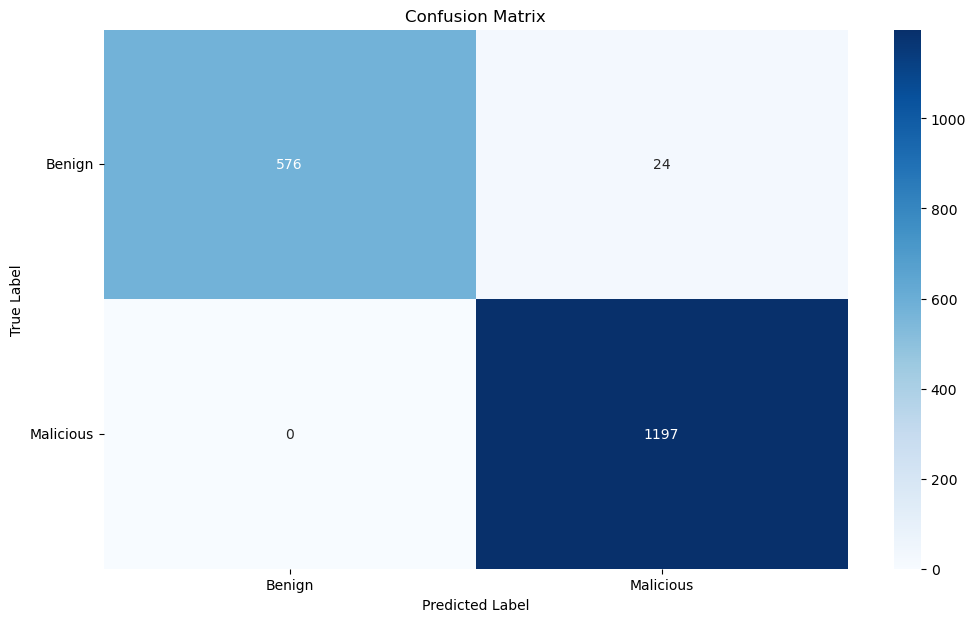

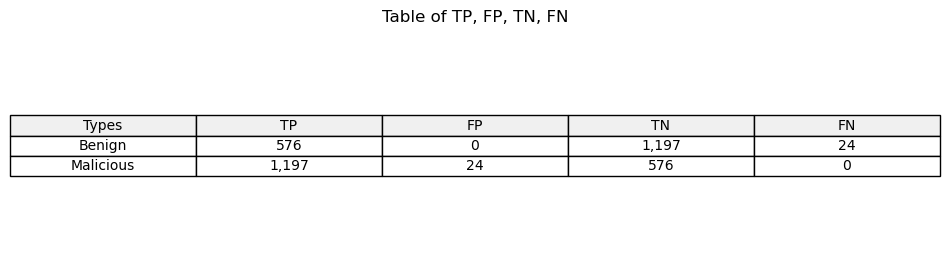

/tmp/ipykernel_79120/3444583433.py:112: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_metrics["Types"], rotation=45, fontsize=10)


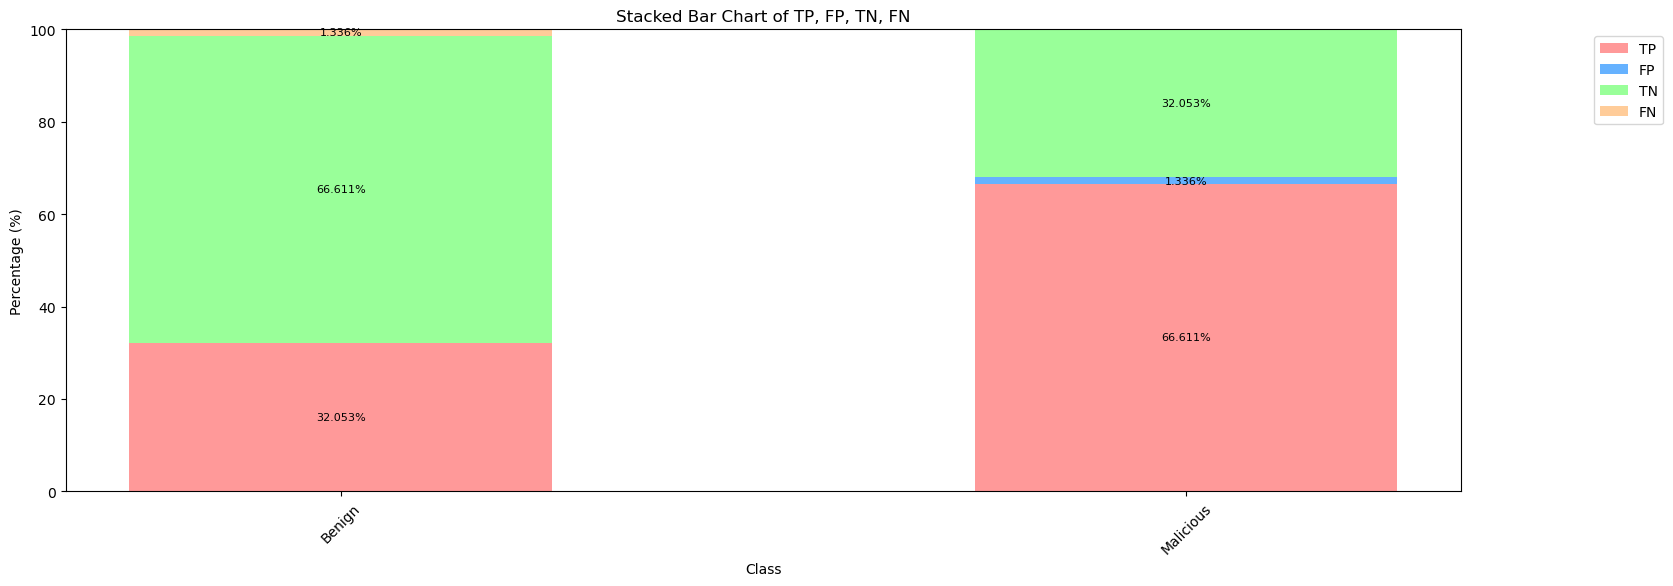

In [4]:
# train_knn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
# --- Cấu hình ---
INPUT_FILE = 'npm_shuffled.csv'
N_NEIGHBORS = 5 # Số 'hàng xóm' cần xem xét

def train_knn_model(input_file):
    print(f"--- Huấn luyện mô hình K-Nearest Neighbors (KNN) ---")
    
    # Bước 1: Tải và chuẩn bị dữ liệu
    try:
        df = pd.read_csv(input_file)
    except FileNotFoundError:
        print(f"Lỗi: Không tìm thấy file '{input_file}'.")
        return

    X = df.drop(columns=['label', 'package_name'])
    y = df['label']
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    print(f"[1/3] Đã chuẩn bị xong dữ liệu.")

    # Bước 2: Huấn luyện mô hình KNN
    # n_neighbors=5 là một giá trị khởi đầu phổ biến.
    # weights='distance' có nghĩa là các hàng xóm gần hơn sẽ có ảnh hưởng lớn hơn.
    model = KNeighborsClassifier(n_neighbors=N_NEIGHBORS, weights='distance', n_jobs=-1)
    print(f"[2/3] Bắt đầu 'huấn luyện' mô hình KNN (thực chất là lưu dữ liệu)...")
    model.fit(X_train_scaled, y_train)
    print("Hoàn tất!")

    # Bước 3: Đánh giá mô hình
    print("[3/3] Đánh giá hiệu suất trên tập kiểm thử...")
    y_pred = model.predict(X_test_scaled)
    
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=['An toàn (Benign)', 'Độc hại (Malicious)'])

    print(f"\n================== KẾT QUẢ ĐÁNH GIÁ (KNN, k={N_NEIGHBORS}) ==================")
    print(f"✅ Độ chính xác (Accuracy): {accuracy:.4f} ({accuracy*100:.2f}%)")
    print("\n📊 Báo cáo Phân loại (Classification Report):")
    print(report)
    print("\n🔀 Ma trận Nhầm lẫn (Confusion Matrix):")
    print(confusion_matrix(y_test, y_pred))
    attack_types = ['Benign', 'Malicious']
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(12, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=attack_types, yticklabels=attack_types)
    plt.yticks(rotation=360)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.savefig("confusion_matrix.png", dpi=300, bbox_inches="tight")
    plt.show()
    
    # Tính và vẽ TP, FP, TN, FN
    metrics = []
    num_classes = len(attack_types)
    for i in range(num_classes):
        TP = cm[i, i]
        FP = cm[:, i].sum() - TP
        FN = cm[i, :].sum() - TP
        TN = cm.sum() - (TP + FP + FN)
        metrics.append([attack_types[i], TP, FP, TN, FN])
    
    df_metrics = pd.DataFrame(metrics, columns=["Types", "TP", "FP", "TN", "FN"])
    fig, ax = plt.subplots(figsize=(10, 3))
    ax.axis("off")
    table_data = [[f"{x:,.0f}" if isinstance(x, (int, float)) else x for x in row] for row in df_metrics.values]
    table = ax.table(cellText=table_data, colLabels=df_metrics.columns, loc="center", cellLoc="center",
                     colColours=["#f0f0f0"] * len(df_metrics.columns))
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.2)
    ax.set_title("Table of TP, FP, TN, FN")
    #plt.tight_layout(pad=0.5)
    plt.savefig("table_tp_fp_tn_fn.png", dpi=300, bbox_inches="tight")
    plt.show()
    
    df_metrics[["TP", "FP", "TN", "FN"]] = df_metrics[["TP", "FP", "TN", "FN"]].div(
        df_metrics[["TP", "FP", "TN", "FN"]].sum(axis=1), axis=0
    ) * 100
    
    fig, ax = plt.subplots(figsize=(18, 6))
    bottom = np.zeros(len(df_metrics))
    colors = ["#FF9999", "#66B2FF", "#99FF99", "#FFCC99"]
    
    for metric, color in zip(["TP", "FP", "TN", "FN"], colors):
        bars = ax.bar(df_metrics["Types"], df_metrics[metric], width=0.5, label=metric, bottom=bottom, color=color)
        for i, bar in enumerate(bars):
            height = bar.get_height()
            if height > 0:
                y_pos = bottom[i] + height / 2
                if height < 1:
                    y_pos += 0.5
                ax.text(bar.get_x() + bar.get_width() / 2, y_pos,
                        f'{height:.3f}%', ha="center", va="center", rotation=0,
                        fontsize=8, color="black")
        bottom += df_metrics[metric]
    
    ax.set_xlabel("Class", fontsize=10)
    ax.set_ylabel("Percentage (%)", fontsize=10)
    ax.set_title("Stacked Bar Chart of TP, FP, TN, FN", fontsize=12)
    ax.set_xticklabels(df_metrics["Types"], rotation=45, fontsize=10)
    ax.legend(loc="upper right", fontsize=10, bbox_to_anchor=(1.15, 1))
    #plt.tight_layout(pad=1.0)
    plt.savefig("stacked_bar_chart_tp_fp_tn_fn.png", dpi=300, bbox_inches="tight")
    plt.show()
if __name__ == '__main__':
    train_knn_model(INPUT_FILE)

In [6]:
# train_logreg
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# --- Cấu hình ---
INPUT_FILE = 'npm_shuffled.csv'

def train_logreg_model(input_file):
    print(f"--- Huấn luyện mô hình Logistic Regression ---")
    
    # Bước 1: Tải và chuẩn bị dữ liệu
    try:
        df = pd.read_csv(input_file)
    except FileNotFoundError:
        print(f"Lỗi: Không tìm thấy file '{input_file}'.")
        return

    X = df.drop(columns=['label', 'package_name'])
    y = df['label']
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    print(f"[1/3] Đã chuẩn bị xong dữ liệu.")

    # Bước 2: Huấn luyện mô hình Logistic Regression
    # solver='liblinear' hoạt động tốt với các bộ dữ liệu nhỏ.
    model = LogisticRegression(solver='liblinear', class_weight='balanced', random_state=42)
    print("[2/3] Bắt đầu huấn luyện mô hình Logistic Regression...")
    model.fit(X_train_scaled, y_train)
    print("Huấn luyện hoàn tất!")

    # Bước 3: Đánh giá mô hình
    print("[3/3] Đánh giá hiệu suất trên tập kiểm thử...")
    y_pred = model.predict(X_test_scaled)
    
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=['An toàn (Benign)', 'Độc hại (Malicious)'])

    print("\n================== KẾT QUẢ ĐÁNH GIÁ (Logistic Regression) ==================")
    print(f"✅ Độ chính xác (Accuracy): {accuracy:.4f} ({accuracy*100:.2f}%)")
    print("\n📊 Báo cáo Phân loại (Classification Report):")
    print(report)
    print("\n🔀 Ma trận Nhầm lẫn (Confusion Matrix):")
    print(confusion_matrix(y_test, y_pred))

if __name__ == '__main__':
    train_logreg_model(INPUT_FILE)

--- Huấn luyện mô hình Logistic Regression ---
[1/3] Đã chuẩn bị xong dữ liệu.
[2/3] Bắt đầu huấn luyện mô hình Logistic Regression...
Huấn luyện hoàn tất!
[3/3] Đánh giá hiệu suất trên tập kiểm thử...

================== KẾT QUẢ ĐÁNH GIÁ (Logistic Regression) ==================
✅ Độ chính xác (Accuracy): 0.9861 (98.61%)

📊 Báo cáo Phân loại (Classification Report):
                     precision    recall  f1-score   support

   An toàn (Benign)       1.00      0.96      0.98       600
Độc hại (Malicious)       0.98      1.00      0.99      1197

           accuracy                           0.99      1797
          macro avg       0.99      0.98      0.98      1797
       weighted avg       0.99      0.99      0.99      1797


🔀 Ma trận Nhầm lẫn (Confusion Matrix):
[[ 575   25]
 [   0 1197]]
